In [ ]:
from multicastps.data.database import MulticastDB
db = MulticastDB()
db.update_overview()
nrep = db.make_participant_report()

In [ ]:
nrep['tot_days_ps'] = nrep['tot_days_ps'].fillna(0).astype(int)

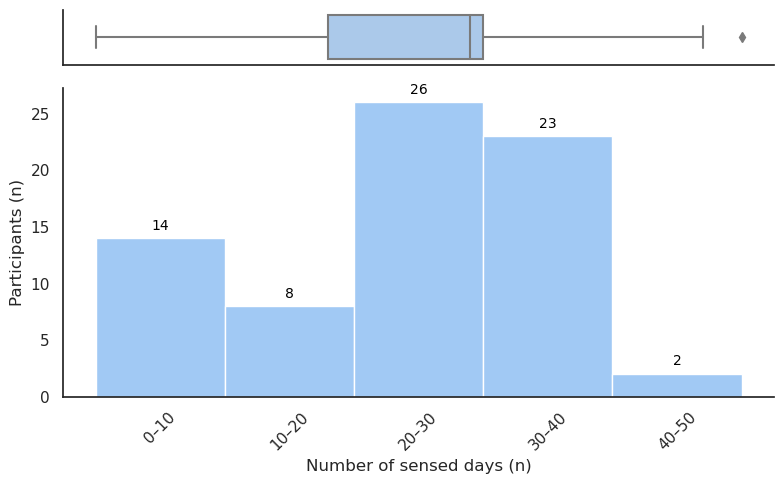

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: customize x-axis label
x_label_name = "Number of sensed days (n)"

sns.set_theme(style="white", palette="pastel")
main_color = sns.color_palette("pastel")[0]  # first color in pastel palette (you can pick another)


# create figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(8, 5))

# boxplot
sns.boxplot(x=nrep['tot_days_ps'], orient="h", ax=ax_box)
ax_box.set(xlabel='')  # remove x label for boxplot

# histogram
n, bins, patches = ax_hist.hist(nrep['tot_days_ps'], bins=5, edgecolor='white')

# label counts on top of bars
for i in range(len(n)):
    ax_hist.text((bins[i] + bins[i+1]) / 2, n[i] + 0.5, int(n[i]), 
                 ha='center', va='bottom', fontsize=10, color='black')

# set x-ticks to show bin intervals
bin_labels = [f"{int(bins[i])}–{int(bins[i+1])}" for i in range(len(bins)-1)]
ax_hist.set_xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)])
ax_hist.set_xticklabels(bin_labels, rotation=45)

# customize axis labels
ax_hist.set_xlabel(x_label_name)
ax_hist.set_ylabel("Participants (n)")

sns.despine(ax=ax_box)
sns.despine(ax=ax_hist)

plt.tight_layout()
#plt.show()
plt.savefig('sensed_days_distribution.png', dpi=300)


In [ ]:
import pandas as pd

# Step 1: Clean NaNs from the lists
nrep['dates_no_ps_idx'] = nrep['dates_no_ps_idx'].apply(
    lambda lst: [v for v in lst if pd.notna(v)] if isinstance(lst, list) else []
)

# Step 2: Define the full range and compute the missing indices
full_set = set(range(1, 29))

nrep['dates_ps_idx'] = nrep['dates_no_ps_idx'].apply(
    lambda lst: sorted(full_set - set(map(int, lst)))
)


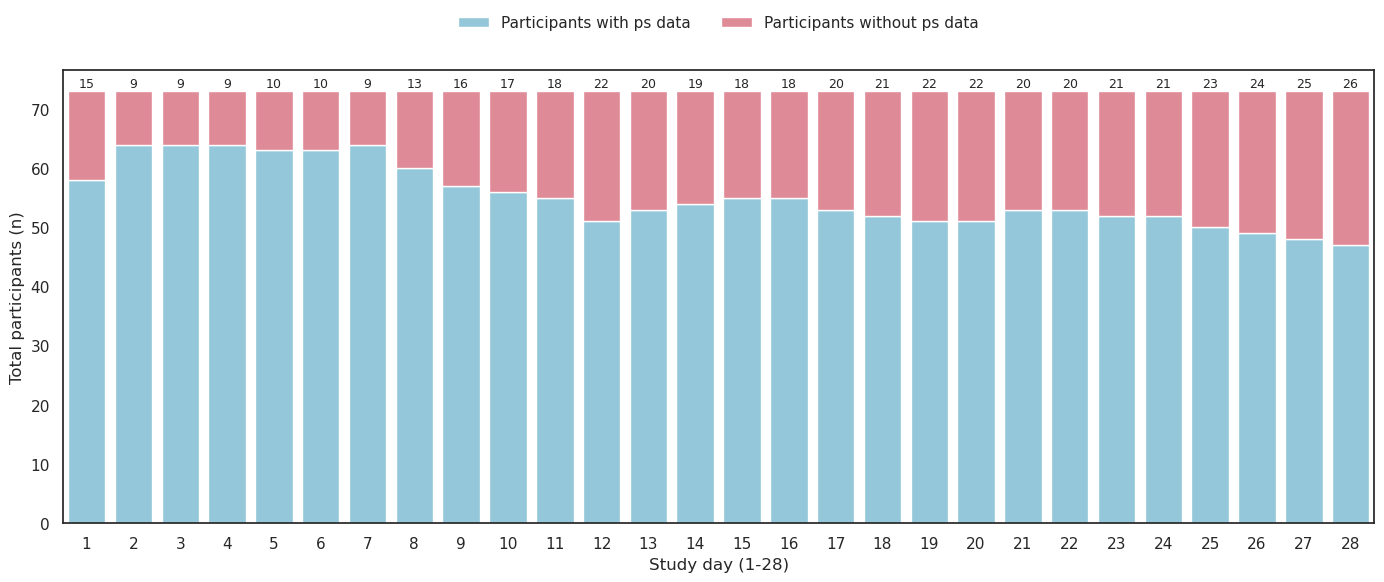

In [ ]:
# --- Count occurrences across all rows ---
no_ps_counts = (
    pd.Series([v for lst in nrep['dates_no_ps_idx'] for v in lst])
    .value_counts()
    .reindex(range(1, 29), fill_value=0)
)

ps_counts = (
    pd.Series([v for lst in nrep['dates_ps_idx'] for v in lst])
    .value_counts()
    .reindex(range(1, 29), fill_value=0)
)

# --- Combine into one DataFrame for plotting ---
plot_df = pd.DataFrame({
    'value': range(1, 29),
    'dates_no_ps_idx': no_ps_counts.values,
    'dates_ps_idx': ps_counts.values
})

# --- Melt for seaborn stacked bar ---
plot_df_melted = plot_df.melt(
    id_vars='value',
    value_vars=['dates_ps_idx', 'dates_no_ps_idx'],
    var_name='Category',
    value_name='Count'
)

# --- Plot stacked bar chart ---
plt.figure(figsize=(14, 6))
bottoms = plot_df['dates_ps_idx']

sns.barplot(
    data=plot_df_melted[plot_df_melted['Category'] == 'dates_ps_idx'],
    x='value', y='Count', color="#89CCE4", label='Participants with ps data',
)
sns.barplot(
    data=plot_df_melted[plot_df_melted['Category'] == 'dates_no_ps_idx'],
    x='value', y='Count', color="#ED7C8D", label='Participants without ps data',
    bottom=bottoms
)

# --- Add counts of dates_no_ps_idx on top of each bar ---
for i, (x, y) in enumerate(zip(plot_df['value'], plot_df['dates_no_ps_idx'] + plot_df['dates_ps_idx'])):
    if plot_df['dates_no_ps_idx'][i] > 0:
        plt.text(x - 1, y + 0.1, str(plot_df['dates_no_ps_idx'][i]), ha='center', va='bottom', fontsize=9)

# --- Aesthetics ---
#plt.title('Stacked Counts of dates_ps_idx (blue) and dates_no_ps_idx (orange)')
plt.xlabel('Study day (1-28)')
plt.ylabel('Total participants (n)')
plt.xticks(range(0, 28), range(1, 29))
plt.legend(
    title='', 
    loc='upper center',
    bbox_to_anchor=(0.5, 1.15),  # Move legend above the plot
    ncol=2,                      # Two items side by side
    frameon=False                # Remove legend box border
)
plt.tight_layout()
plt.savefig('ps_dropout.png', dpi=300)

#plt.show()

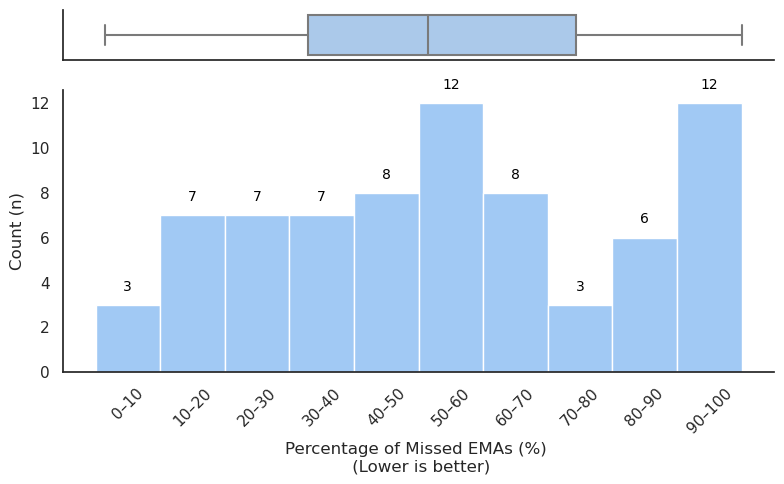

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: customize x-axis label
x_label_name = "Percentage of Missed EMAs (%) \n (Lower is better)"

sns.set_theme(style="white", palette="pastel")
main_color = sns.color_palette("pastel")[0]  # first color in pastel palette (you can pick another)


# create figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(8, 5))

# boxplot
sns.boxplot(x=rep['ema_missed_pct'], orient="h", ax=ax_box)
ax_box.set(xlabel='')  # remove x label for boxplot

# histogram
n, bins, patches = ax_hist.hist(rep['ema_missed_pct'], bins=10, range=(0,100), edgecolor='white')

# label counts on top of bars
for i in range(len(n)):
    ax_hist.text((bins[i] + bins[i+1]) / 2, n[i] + 0.5, int(n[i]), 
                 ha='center', va='bottom', fontsize=10, color='black')

# set x-ticks to show bin intervals
bin_labels = [f"{int(bins[i])}–{int(bins[i+1])}" for i in range(len(bins)-1)]
ax_hist.set_xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)])
ax_hist.set_xticklabels(bin_labels, rotation=45)

# customize axis labels
ax_hist.set_xlabel(x_label_name)
ax_hist.set_ylabel("Count (n)")

sns.despine(ax=ax_box)
sns.despine(ax=ax_hist)

plt.tight_layout()
#plt.show()
plt.savefig('ema_missed_percentage_distribution.png', dpi=300)


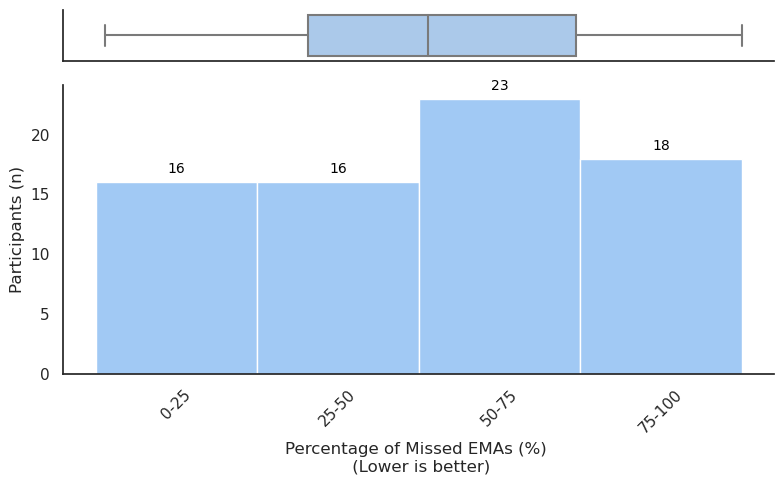

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Example: customize x-axis label
x_label_name = "Percentage of Missed EMAs (%) \n (Lower is better)"

sns.set_theme(style="white", palette="pastel")
main_color = sns.color_palette("pastel")[0]  # first color in pastel palette (you can pick another)


# create figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)},
                                    figsize=(8, 5))

# boxplot
sns.boxplot(x=rep['ema_missed_pct'], orient="h", ax=ax_box)
ax_box.set(xlabel='')  # remove x label for boxplot

# histogram
n, bins, patches = ax_hist.hist(rep['ema_missed_pct'], bins=4, range=(0,100), edgecolor='white')

# label counts on top of bars
for i in range(len(n)):
    ax_hist.text((bins[i] + bins[i+1]) / 2, n[i] + 0.5, int(n[i]), 
                 ha='center', va='bottom', fontsize=10, color='black')

# set x-ticks to show bin intervals
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]
ax_hist.set_xticks([(bins[i] + bins[i+1]) / 2 for i in range(len(bins)-1)])
ax_hist.set_xticklabels(bin_labels, rotation=45)

# customize axis labels
ax_hist.set_xlabel(x_label_name)
ax_hist.set_ylabel("Participants (n)")

sns.despine(ax=ax_box)
sns.despine(ax=ax_hist)

plt.tight_layout()
plt.savefig('ema_missed_percentage_distribution.png', dpi=300)
